In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

%matplotlib inline

In [2]:
with open('./../data/races/races-athletes-count.jl', 'r') as f:
    data_count = [json.loads(line.strip()) for line in f.readlines()]

In [3]:
entries = []
for race in data_count:
    year,month,day = re.match("(\d{4})(\d{2})(\d{2})", race['date']).groups()
    entries.append(np.array([
        race['id'], int(year), int(month), int(day), race['count'], race['region'] 
    ]))
    
entries = np.vstack(entries)
df = pd.DataFrame(entries, columns=['id', 'year', 'month', 'day', 'count', 'region'])

# force types
for col in ['year', 'month', 'day', 'count']:
    df.loc[:, col] = df.loc[:, col].astype(int)
   
# add info about type of race
df["type"] = df.id.apply(lambda x: 'half' if '70.3' in x else 'full')
df.head()

,id,year,month,day,count,region,type
0,mallorca70.3,2011,5,14,1857,emea,half
1,mallorca70.3,2012,5,12,1924,emea,half
2,mallorca70.3,2013,5,11,2944,emea,half
3,dubai70.3,2017,1,27,1427,emea,half
4,dubai70.3,2016,1,29,678,emea,half


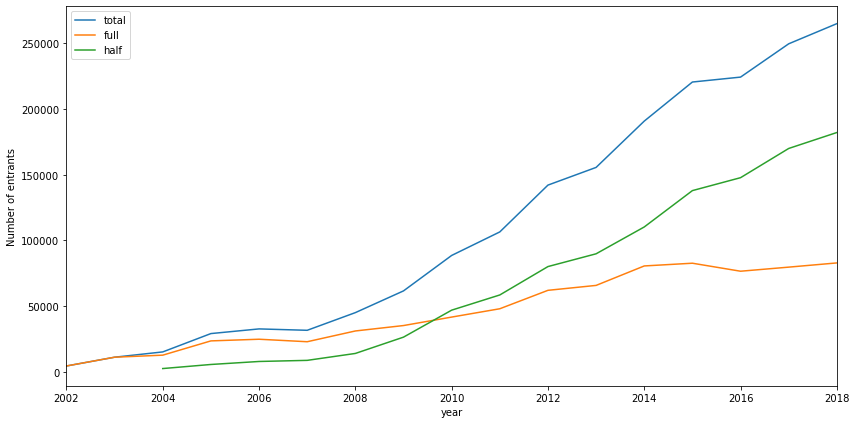

In [4]:
fig,ax = plt.subplots(figsize=(12, 6))

# years prior current year
selection = df.loc[df.year<2019]

# all entries
selection.groupby('year')['count'].sum().plot(ax=ax, label="total")
# ironman
selection.loc[selection.type=='full'].groupby('year')['count'].sum().plot(ax=ax, label="full")
# half ironman
selection.loc[selection.type=='half'].groupby('year')['count'].sum().plot(ax=ax, label="half")

ax.set_ylabel("Number of entrants")

ax.legend()

fig.tight_layout()

fig.savefig("number-entrants.pdf")

In [5]:
df.region.unique()

array(['emea', 'americas', 'asiapac'], dtype=object)

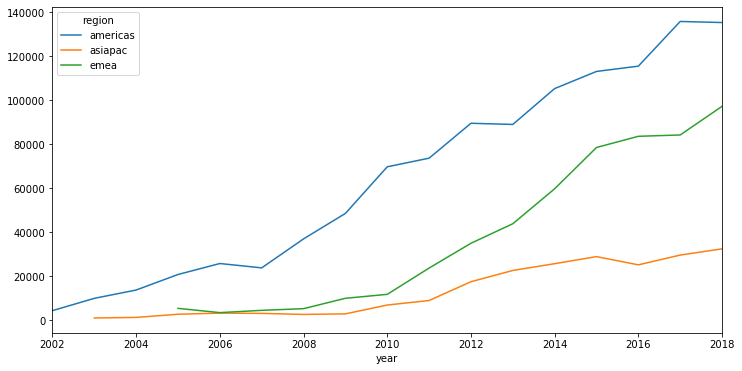

In [8]:
selection.groupby(['region', 'year'])['count'].sum().unstack().transpose().plot(figsize=(12, 6))
fig.savefig("entrants-region.pdf")

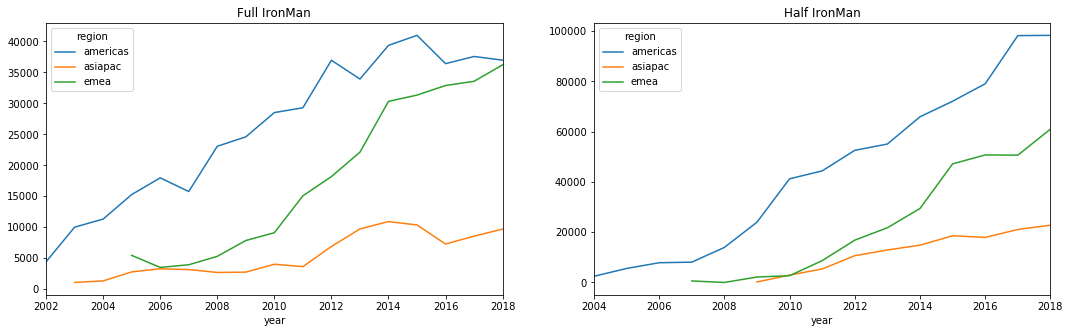

In [9]:
fig,(ax1,ax2) = plt.subplots(figsize=(18, 5), ncols=2)

# full ironman
selection.groupby(['type', 'region', 'year'])['count'].sum().unstack(level=1).transpose()['full'].transpose().plot(ax=ax1)
ax1.set_title("Full IronMan")
# half ironman
selection.groupby(['type', 'region', 'year'])['count'].sum().unstack(level=1).transpose()['half'].transpose().plot(ax=ax2)
ax2.set_title("Half IronMan")

fig.savefig("entrants-region-type.pdf")

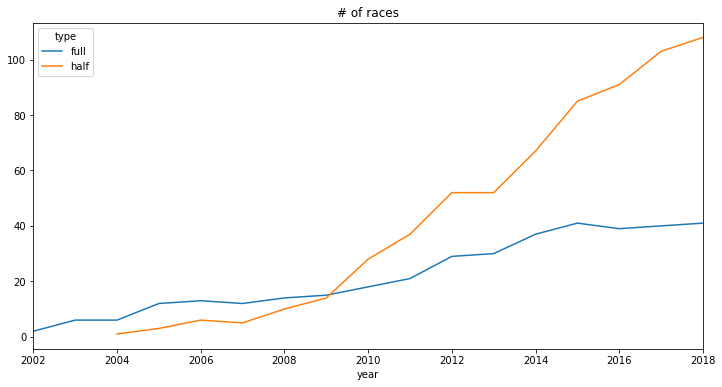

In [11]:
fig,ax = plt.subplots(figsize=(12, 6))
selection.groupby(["year", "type"]).count().unstack()["id"].plot(ax=ax)
ax.set_title("# of races")
fig.savefig("number-races.pdf")

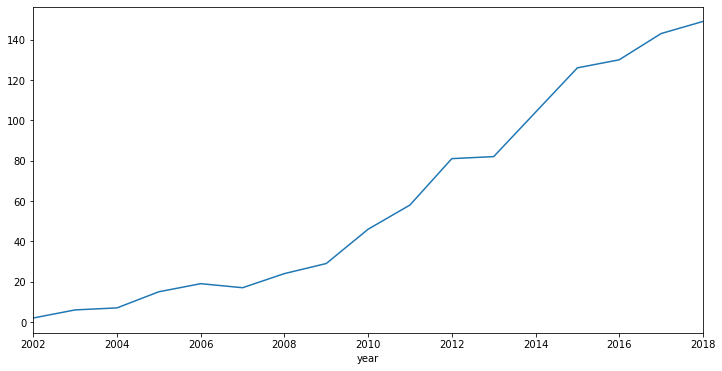

In [6]:
fig,ax = plt.subplots(figsize=(12, 6))
selection.groupby("year").count().unstack()["id"].plot(ax=ax)
# ax.set_title("# of races")
# fig.savefig("number-races.pdf")

In [19]:
selection.groupby(["year", "type"]).count().unstack()["id"]

type,full,half
year,,
2002,2.0,NaN
2003,6.0,NaN
2004,6.0,1.0
2005,12.0,3.0
2006,13.0,6.0
2007,12.0,5.0
2008,14.0,10.0
2009,15.0,14.0
2010,18.0,28.0
